# Credit Risk Evaluator

In [83]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [84]:
# Import the data
file = 'Resources/lending_data.csv'
df = pd.read_csv(file)

Inspect Dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [86]:
df.nunique()


loan_size            182
interest_rate       4692
borrower_income      662
debt_to_income       662
num_of_accounts       17
derogatory_marks       4
total_debt           662
loan_status            2
dtype: int64

Cleaned Dataset

In [87]:
for key in df:
    print(f'Duplicates in column {key} : {df[key].duplicated().sum()}')

Duplicates in column loan_size : 77354
Duplicates in column interest_rate : 72844
Duplicates in column borrower_income : 76874
Duplicates in column debt_to_income : 76874
Duplicates in column num_of_accounts : 77519
Duplicates in column derogatory_marks : 77532
Duplicates in column total_debt : 76874
Duplicates in column loan_status : 77534


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

My prediction is that the Random Forest Classifier will generate a better result as it emphasizes feature selection, weighs certain features as more important than others. With a credit analysis, we might find some feature having a greater impact than others.

## Split the Data into Training and Testing Sets

Original dataset (df)

In [88]:
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [89]:
# Split the data into X_train, X_test, y_train, y_test
def training_split(df):

    X = df.drop('loan_status', axis=1)
    y = df['loan_status']
    print("Shape: ", X.shape, y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    return (X, y, X_train, X_test, y_train, y_test)

Original Dataset (df)

In [90]:
X, y, X_train, X_test, y_train, y_test = training_split(df)

Shape:  (77536, 7) (77536,)


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier.

In [91]:
# Train a Logistic Regression model and print the model score
classifier = LogisticRegression()
classifier_reduced = LogisticRegression()

Original Dataset (df)

In [92]:
classifier.fit(X_train, y_train)

LogisticRegression()

Prediction test - Original Dataset

In [93]:
print(f'Actual:\t\t{list(y_test[:20])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:20]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]


Logistic Regression Score for Training and Testing Data - Original Dataset

In [94]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


Confusion Matrix - Logistic Regression - Original Dataset

In [95]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [96]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


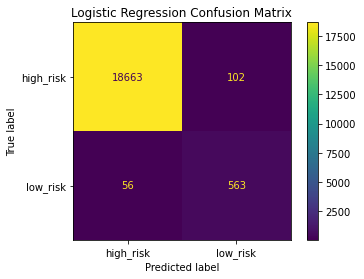

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['high_risk', 'low_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Logistic Regression Confusion Matrix', 
                )
plt.show()

Random Forest Score for Training and Testing Data - Original Dataset

In [98]:
# Train a Random Forest Classifier model and print the model score
# Not Scaled
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.991642591828312


In [99]:
y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18665,   100],
       [   62,   557]], dtype=int64)

In [100]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.991642591828312


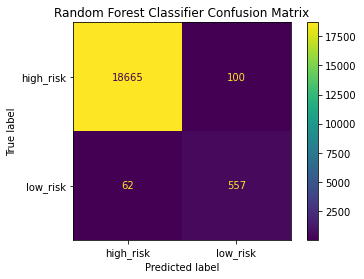

In [101]:
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['high_risk', 'low_risk'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Random Forest Classifier Confusion Matrix', 
                )
plt.show()

In [102]:
feature_importances = clf.feature_importances_

Feature Importance - Random Forrest

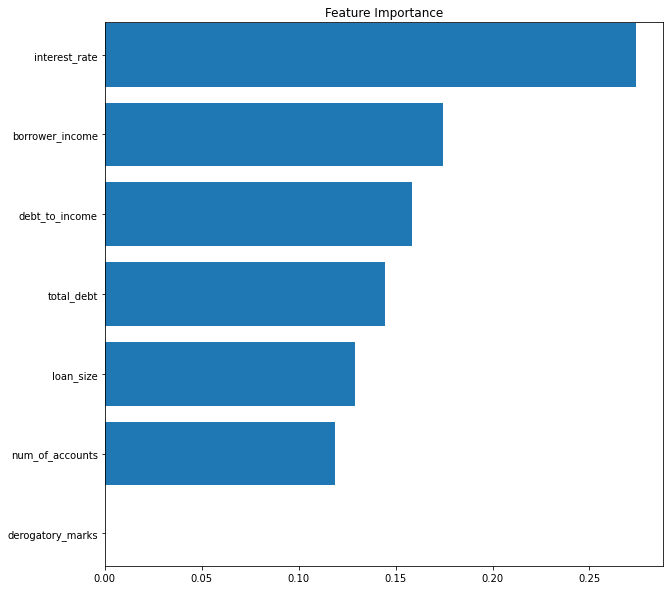

In [103]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)
plt.title("Feature Importance")
plt.show()

In [104]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [106]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


With both models tested we can observe they performed exceptionally well. 
The Logistic Regression model was able to provide a slightly higher return of accuracy which is also represented visually by the confusion matrix.
The testing and training scores may imply overfitting which is something that needs to be taken into consideration.